## Imports

In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache

print("Packages Imported!")

Packages Imported!


## Settings

In [3]:
MANIFEST_PATH = "E:/datasets/allen_vc/manifest_files/manifest.json"
# MANIFEST_PATH = "D:/datasets/allen_vc/manifest.json"
PROJECT_PATH = "G:/Shared drives/visual_encoding"
REPO_PATH = 'C:/Users/User/visual_encoding'
# REPO_PATH = 'C:/Users/micha/projects/visual_encoding'

## Functions

In [ ]:
#tbd

## Load dataset

In [4]:
# Create Allensdk cache object
cache = EcephysProjectCache.from_warehouse(manifest=MANIFEST_PATH)

In [5]:
# Isolate functional connectivity sections
sessions = cache.get_session_table()
functional_connectivity_sessions = sessions[sessions['session_type'] == 'functional_connectivity']

# Observe Cre distribution
functional_connectivity_sessions['full_genotype'].value_counts()

wt/wt                                              14
Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       6
Vip-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt       3
Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt     3
Name: full_genotype, dtype: int64

In [6]:
functional_connectivity_sessions.head()

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
766640955,2019-10-03T00:00:00Z,744912849,functional_connectivity,133.0,M,wt/wt,842,2233,6,"[MB, APN, NOT, DG, CA1, VISam, nan, PF, TH, LP..."
767871931,2019-10-03T00:00:00Z,753795610,functional_connectivity,135.0,M,wt/wt,713,2231,6,"[MRN, APN, MB, DG, CA1, VISrl, nan, VISam, PO,..."
768515987,2019-10-03T00:00:00Z,754477358,functional_connectivity,136.0,M,wt/wt,802,2217,6,"[MB, APN, NOT, DG, CA1, VISam, nan, Eth, LP, P..."
771160300,2019-10-03T00:00:00Z,754488979,functional_connectivity,142.0,M,wt/wt,930,2230,6,"[SCig, PPT, NOT, SUB, ProS, CA1, VISam, nan, A..."
771990200,2019-10-03T00:00:00Z,756578435,functional_connectivity,108.0,M,wt/wt,546,2229,6,"[APN, MB, DG, CA1, VISam, nan, PO, LP, VISpm, ..."


In [8]:
session = cache.get_session_data(786091066)

In [11]:
# all unit data
units = session.units
units.columns

Index(['waveform_repolarization_slope', 'presence_ratio', 'L_ratio',
       'waveform_velocity_above', 'amplitude_cutoff', 'waveform_duration',
       'firing_rate', 'nn_miss_rate', 'cluster_id', 'local_index_unit',
       'silhouette_score', 'waveform_PT_ratio', 'snr', 'isolation_distance',
       'waveform_velocity_below', 'waveform_halfwidth', 'waveform_spread',
       'nn_hit_rate', 'cumulative_drift', 'peak_channel_id', 'isi_violations',
       'waveform_recovery_slope', 'waveform_amplitude', 'd_prime', 'max_drift',
       'c50_dg', 'area_rf', 'fano_dg', 'fano_dm', 'fano_fl', 'fano_rf',
       'f1_f0_dg', 'g_dsi_dg', 'g_osi_dg', 'azimuth_rf', 'mod_idx_dg',
       'p_value_rf', 'pref_tf_dg', 'run_mod_dg', 'run_mod_dm', 'run_mod_fl',
       'run_mod_rf', 'pref_dir_dm', 'pref_ori_dg', 'run_pval_dg',
       'run_pval_dm', 'run_pval_fl', 'run_pval_rf', 'elevation_rf',
       'pref_speed_dm', 'firing_rate_dg', 'firing_rate_dm', 'firing_rate_fl',
       'firing_rate_rf', 'on_off_ratio_fl

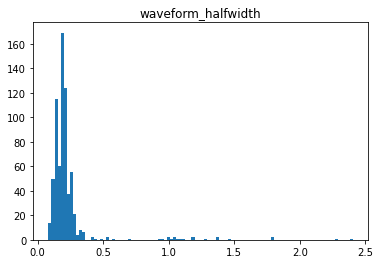

In [30]:
plt.hist(units['waveform_halfwidth'], bins=100)
plt.title('waveform_halfwidth');

In [28]:
threshold = 0.8
slow_spike = (units['waveform_halfwidth'] > threshold).sum()
fast_spike = (units['waveform_halfwidth'] < threshold).sum()

print(f'At threshold {threshold} there are {fast_spike} fast spiking units and {slow_spike} slow spiking units.')

At threshold 0.8 there are 671 fast spiking units and 20 slow spiking units.


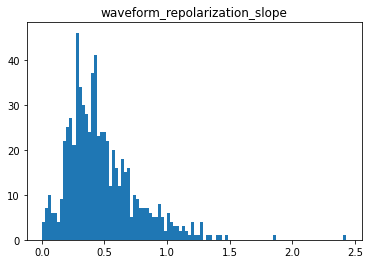

In [31]:
plt.hist(units['waveform_repolarization_slope'], bins=100)
plt.title('waveform_repolarization_slope');

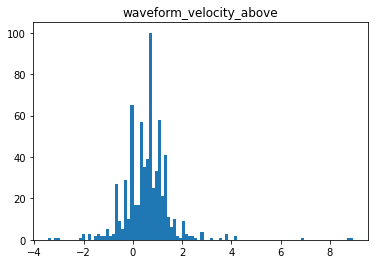

In [32]:
plt.hist(units['waveform_velocity_above'], bins=100)
plt.title('waveform_velocity_above');

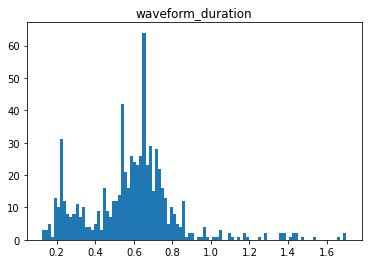

In [33]:
plt.hist(units['waveform_duration'], bins=100)
plt.title('waveform_duration');

In [35]:
threshold = 0.4
slow_spike = (units['waveform_duration'] > threshold).sum()
fast_spike = (units['waveform_duration'] < threshold).sum()

print(f'At threshold {threshold} there are {fast_spike} fast spiking units and {slow_spike} slow spiking units.')

At threshold 0.4 there are 145 fast spiking units and 555 slow spiking units.


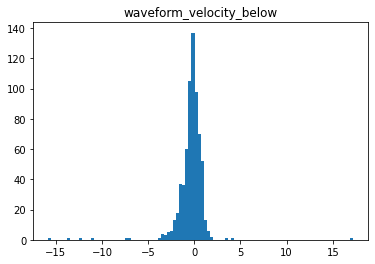

In [36]:
plt.hist(units['waveform_velocity_below'], bins=100)
plt.title('waveform_velocity_below');

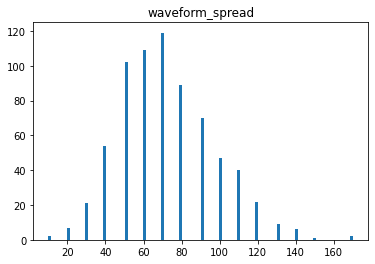

In [37]:
plt.hist(units['waveform_spread'], bins=100)
plt.title('waveform_spread');

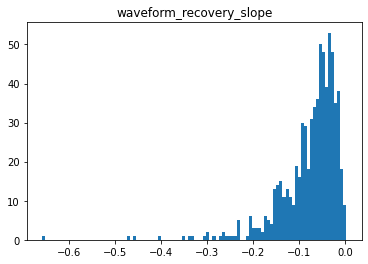

In [38]:
plt.hist(units['waveform_recovery_slope'], bins=100)
plt.title('waveform_recovery_slope');

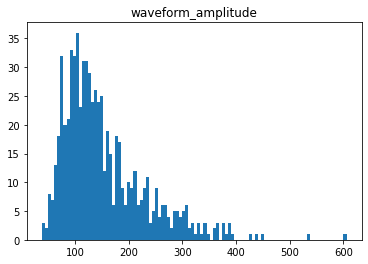

In [39]:
plt.hist(units['waveform_amplitude'], bins=100)
plt.title('waveform_amplitude');

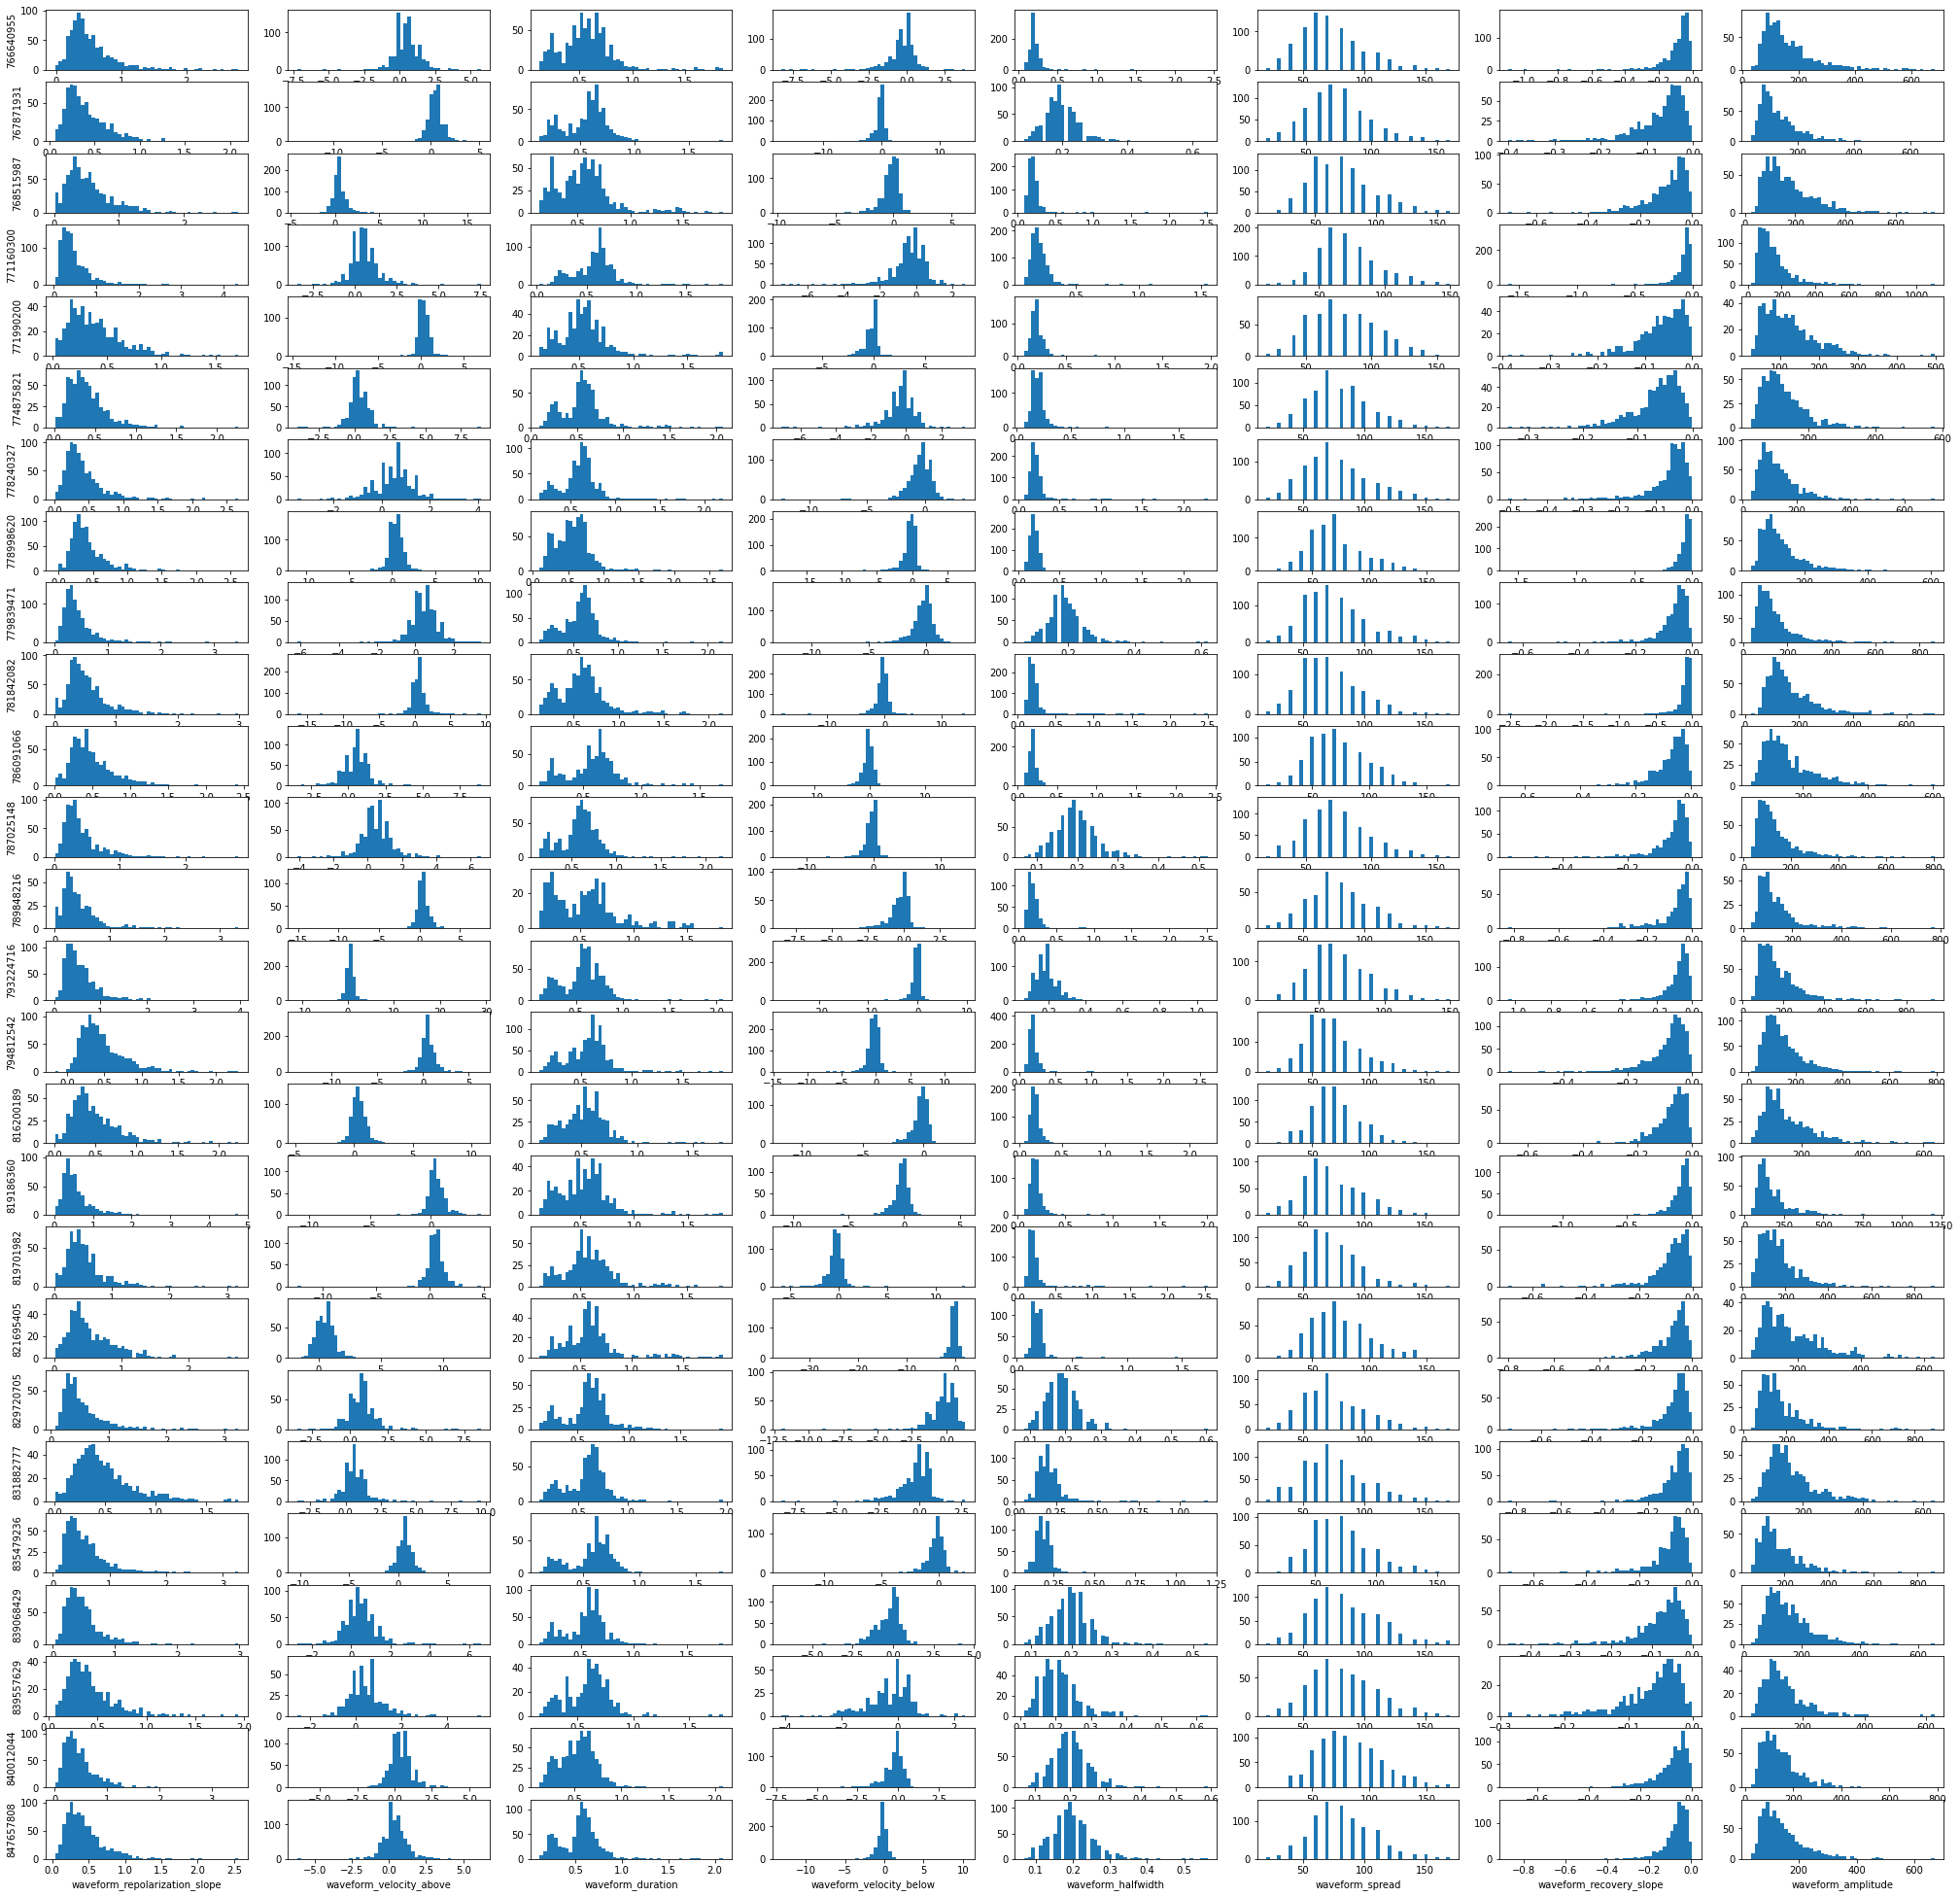

In [49]:
# loop through each session and plot these histograms
waveform_metrics = ['waveform_repolarization_slope',
       'waveform_velocity_above', 'waveform_duration',
       'waveform_velocity_below', 'waveform_halfwidth', 'waveform_spread',
       'waveform_recovery_slope', 'waveform_amplitude']


fig, axs = plt.subplots(len(functional_connectivity_sessions.index), len(waveform_metrics), figsize=(35, 35))
                        
for i, session_id in enumerate(functional_connectivity_sessions.index):
    # print(session_id)
    
    session = cache.get_session_data(session_id)
    units = session.units
    
    for j, wvm in enumerate(waveform_metrics):
        
        axs[i, j].hist(units[wvm], bins=50)
                        
        if j == 0:
            axs[i, j].set_ylabel(session_id)
                        
        if i==len(functional_connectivity_sessions.index)-1:
                axs[i, j].set_xlabel(wvm)

In [13]:
# overall mean waveform voltages
units_wv = session.mean_waveforms
units_wv

{950992053: <xarray.DataArray (channel_id: 374, time: 82)>
 array([[ 0.     ,  1.05885, -0.66144, ..., -0.22113,  0.24609,  0.22737],
        [ 0.     , -0.69654, -0.36465, ...,  0.741  ,  0.37713, -0.32214],
        [ 0.     ,  0.4485 ,  0.61932, ...,  0.46332, -0.51519,  0.039  ],
        ...,
        [ 0.     ,  0.97383,  1.11345, ...,  0.89895,  1.91646,  1.54635],
        [ 0.     ,  0.90285,  0.93327, ...,  0.56589,  1.70469,  1.58028],
        [ 0.     ,  0.51363,  1.07484, ...,  0.38415,  0.9165 ,  1.01595]])
 Coordinates:
   * channel_id  (channel_id) int32 849937886 849937888 ... 849938650 849938652
   * time        (time) float64 0.0 3.333e-05 6.667e-05 ... 0.002667 0.0027,
 950992177: <xarray.DataArray (channel_id: 374, time: 82)>
 array([[ 0.     ,  1.75656, -0.25194, ..., -2.75457,  1.96287,  0.31122],
        [ 0.     , -1.03116, -0.43329, ...,  0.4524 ,  0.90792,  1.51359],
        [ 0.     , -1.87317, -1.57755, ..., -0.43134,  1.00854,  1.06158],
        ...,
        [